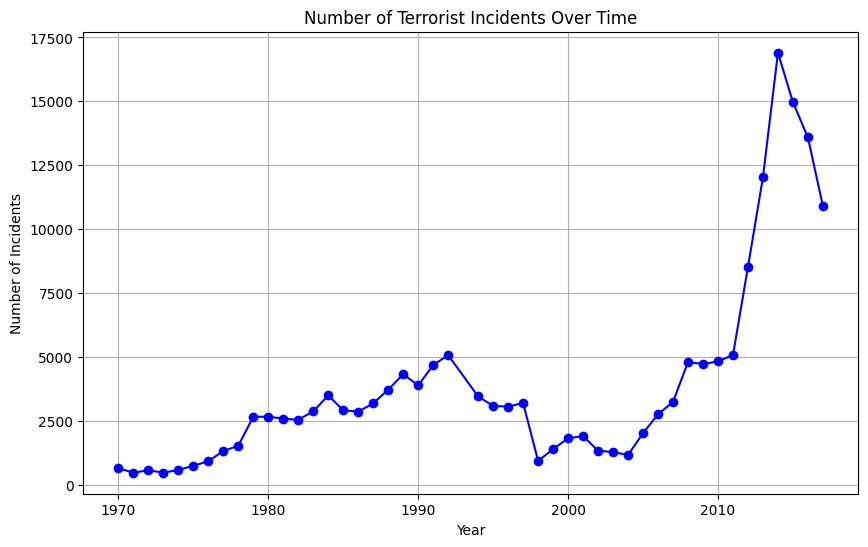

<Figure size 1000x600 with 0 Axes>

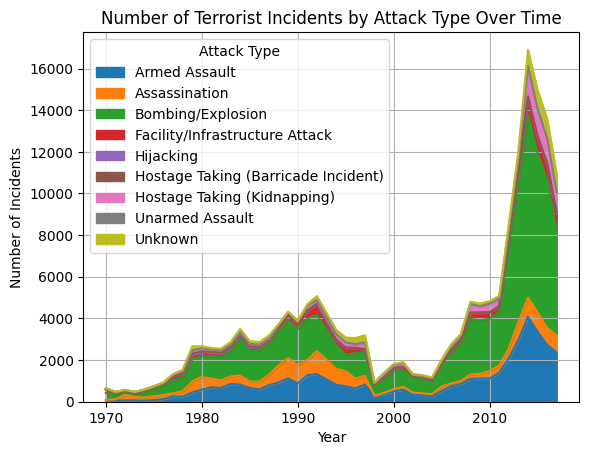

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with full path
df = pd.read_csv(r'C:\Users\n.rennie\Documents\Project 1 dataset\terrorism_dataset.csv')

# Preprocess the data (optional, depending on your dataset)

# Convert 'iyear' column to datetime format
df['iyear'] = pd.to_datetime(df['iyear'], format='%Y')

# Temporal Analysis
# Group by year and count the number of terrorist incidents
incidents_per_year = df.groupby(df['iyear'].dt.year)['country'].count()

# Group by year and attack type, then count the occurrences of each attack type
attack_types_per_year = df.groupby([df['iyear'].dt.year, 'attacktype1_txt'])['country'].count().unstack()

# Visualization
# Plotting the number of terrorist incidents over time
plt.figure(figsize=(10, 6))
incidents_per_year.plot(kind='line', color='blue', marker='o')
plt.title('Number of Terrorist Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Plotting the number of incidents by attack type over time
plt.figure(figsize=(10, 6))
attack_types_per_year.plot(kind='area', stacked=True)
plt.title('Number of Terrorist Incidents by Attack Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


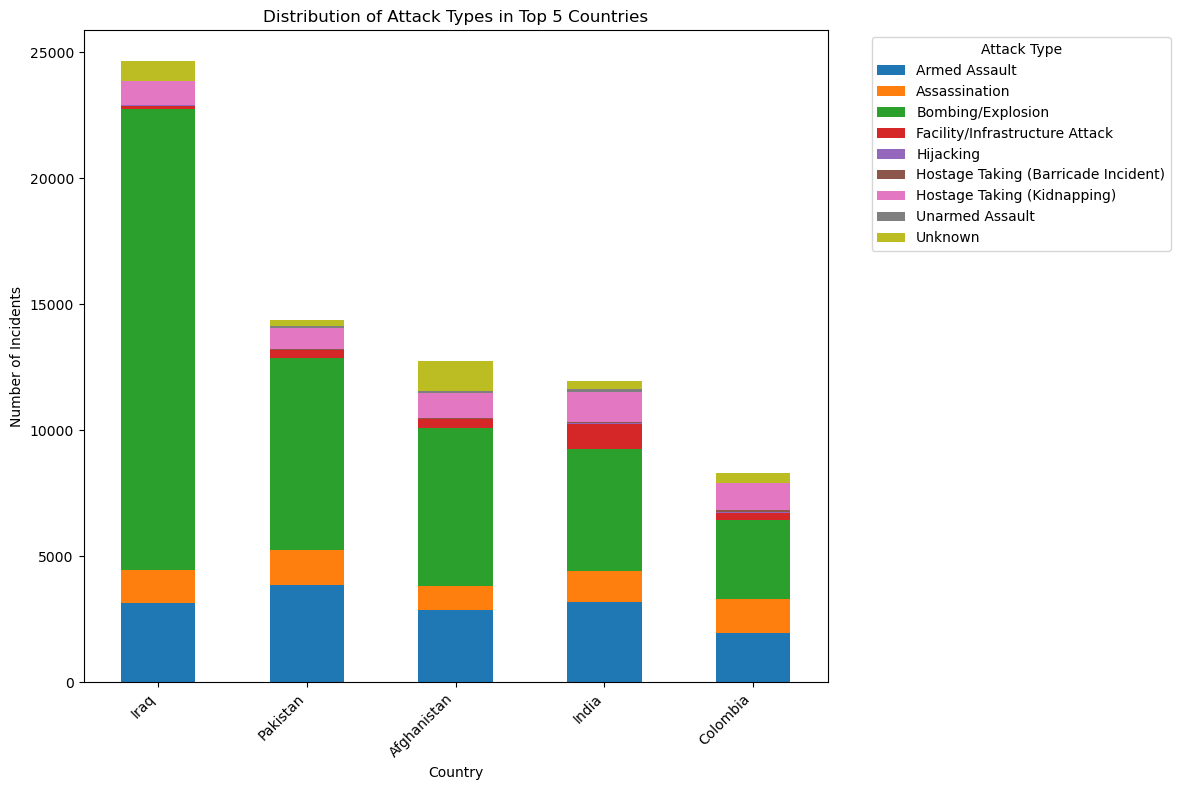

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Filter the top 5 countries
top_countries = total_incidents_per_country.nlargest(5)
attack_types_top = attack_types_per_country.loc[top_countries.index]

# Plotting the grouped bar chart
ax = attack_types_top.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
ax.set_title('Distribution of Attack Types in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Incidents')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


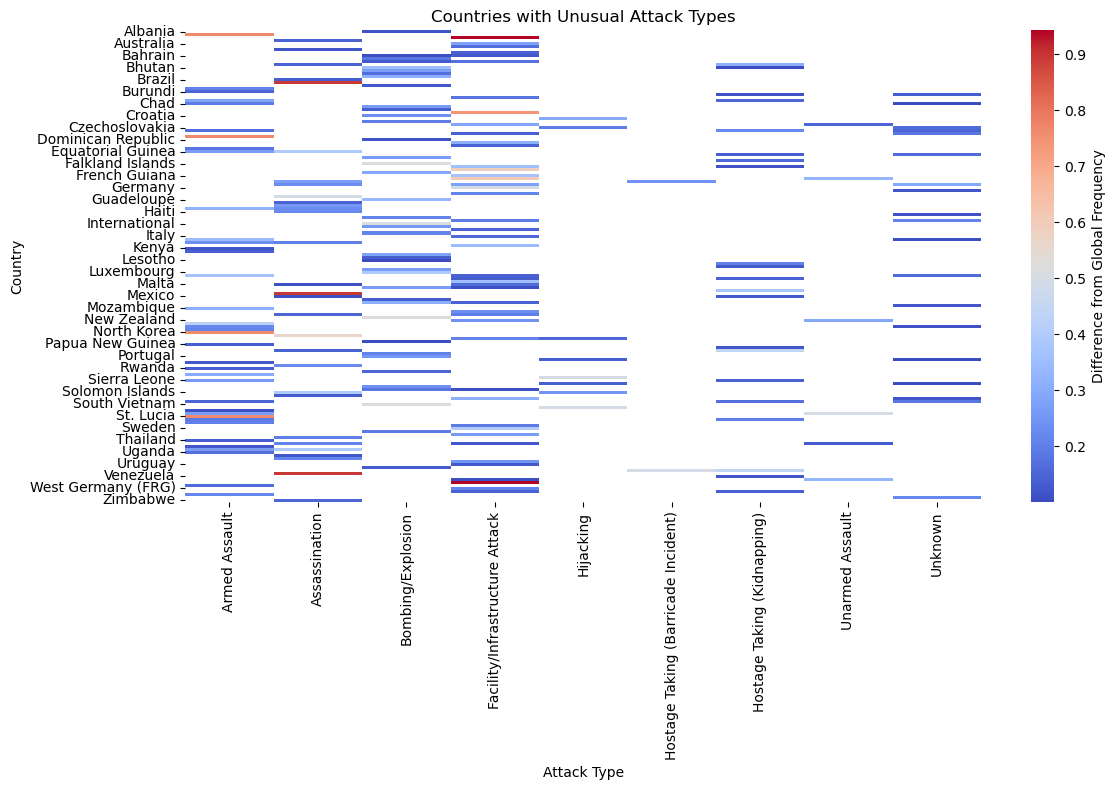

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("terrorism_dataset.csv")

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Calculate the total number of incidents for each attack type globally
total_incidents_global = attack_types_per_country.sum()

# Calculate the frequency of each attack type globally
attack_type_frequency_global = total_incidents_global / total_incidents_global.sum()

# Calculate the frequency of each attack type for each country
attack_type_frequency_per_country = attack_types_per_country.div(attack_types_per_country.sum(axis=1), axis=0)

# Calculate the difference between the frequency of each attack type in each country and the global frequency
attack_type_frequency_difference = attack_type_frequency_per_country.sub(attack_type_frequency_global, axis=1)

# Find countries where certain attack types are significantly more prevalent compared to the global average
unusual_countries = attack_type_frequency_difference[attack_type_frequency_difference > 0.1].dropna(axis=0, how='all')

# Visualize the unusual attack types per country using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(unusual_countries, cmap='coolwarm', cbar_kws={'label': 'Difference from Global Frequency'})

# Add labels and title
plt.xlabel('Attack Type')
plt.ylabel('Country')
plt.title('Countries with Unusual Attack Types')

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv("terrorism_dataset.csv")

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Find the dominant attack type for each country
dominant_attack_type_per_country = attack_types_per_country.idxmax(axis=1)

# Filter out countries where the dominant attack type is not bombing/explosion
countries_without_bombing_explosion = dominant_attack_type_per_country[dominant_attack_type_per_country != 'Bombing/Explosion']

print("Countries that did not have bombing/explosion as their highest attack type:")
print(countries_without_bombing_explosion)


Countries that did not have bombing/explosion as their highest attack type:
country
Andorra                                      Armed Assault
Antigua and Barbuda         Facility/Infrastructure Attack
Belize                         Hostage Taking (Kidnapping)
Brazil                                       Assassination
Brunei                                       Assassination
                                         ...              
Vietnam                                    Unarmed Assault
Wallis and Futuna           Facility/Infrastructure Attack
West Bank and Gaza Strip                     Armed Assault
Yugoslavia                                   Armed Assault
Zaire                                        Armed Assault
Length: 67, dtype: object


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_29936\1166716436.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


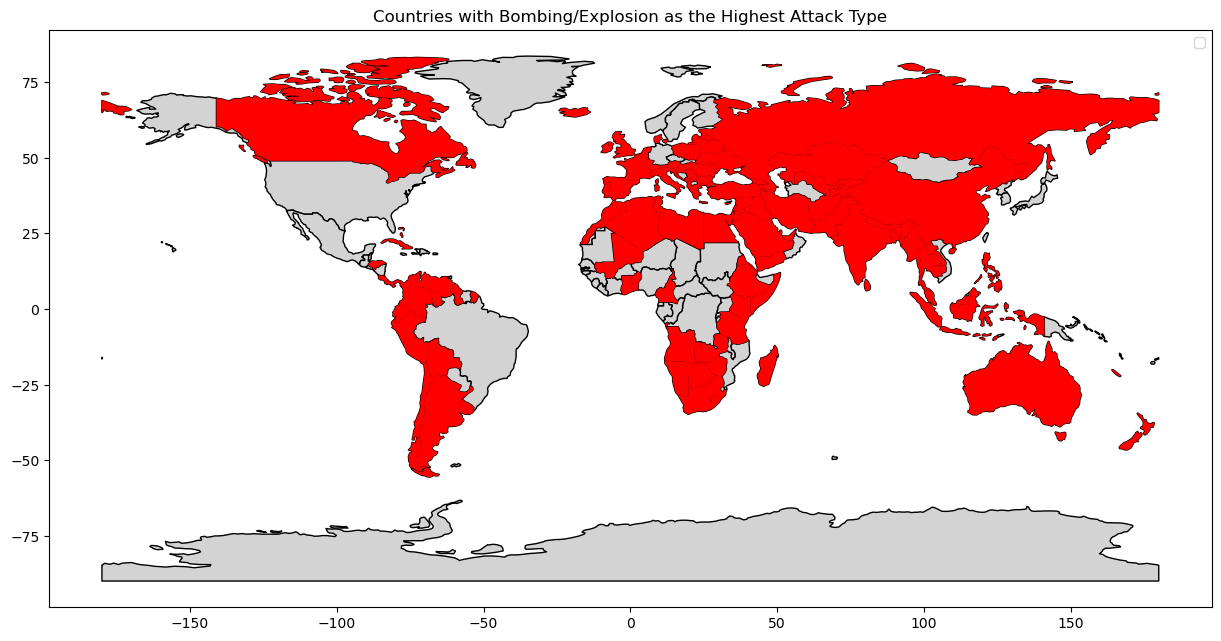

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("terrorism_dataset.csv")

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Find the dominant attack type for each country
dominant_attack_type_per_country = attack_types_per_country.idxmax(axis=1)

# Filter out countries where the dominant attack type is bombing/explosion
bombing_explosion_countries = dominant_attack_type_per_country[dominant_attack_type_per_country == 'Bombing/Explosion']

# Convert bombing_explosion_countries Series to DataFrame
bombing_explosion_df = bombing_explosion_countries.reset_index()

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the attack data with the world shapefile
world = world.merge(bombing_explosion_df, how='left', left_on='name', right_on='country')

# Plotting the map
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot countries with bombing/explosion as the highest attack type
world[~world['country'].isnull()].plot(ax=ax, color='red')

# Add title and legend
plt.title('Countries with Bombing/Explosion as the Highest Attack Type')
plt.legend(['Bombing/Explosion'])

plt.show()


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_29936\4165158374.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


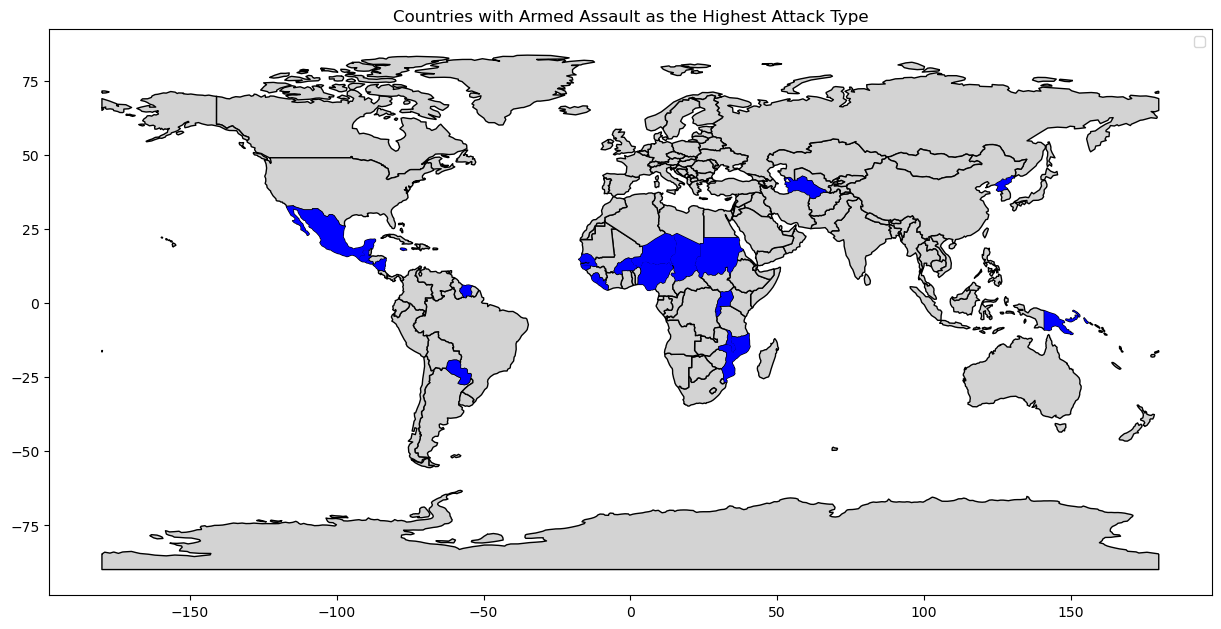

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("terrorism_dataset.csv")

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Find the dominant attack type for each country
dominant_attack_type_per_country = attack_types_per_country.idxmax(axis=1)

# Filter out countries where the dominant attack type is armed assault
armed_assault_countries = dominant_attack_type_per_country[dominant_attack_type_per_country == 'Armed Assault']

# Convert armed_assault_countries Series to DataFrame
armed_assault_df = armed_assault_countries.reset_index()

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the attack data with the world shapefile
world = world.merge(armed_assault_df, how='left', left_on='name', right_on='country')

# Plotting the map
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot countries with armed assault as the highest attack type
world[~world['country'].isnull()].plot(ax=ax, color='blue')

# Add title and legend
plt.title('Countries with Armed Assault as the Highest Attack Type')
plt.legend(['Armed Assault'])

plt.show()


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_29936\2885905138.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


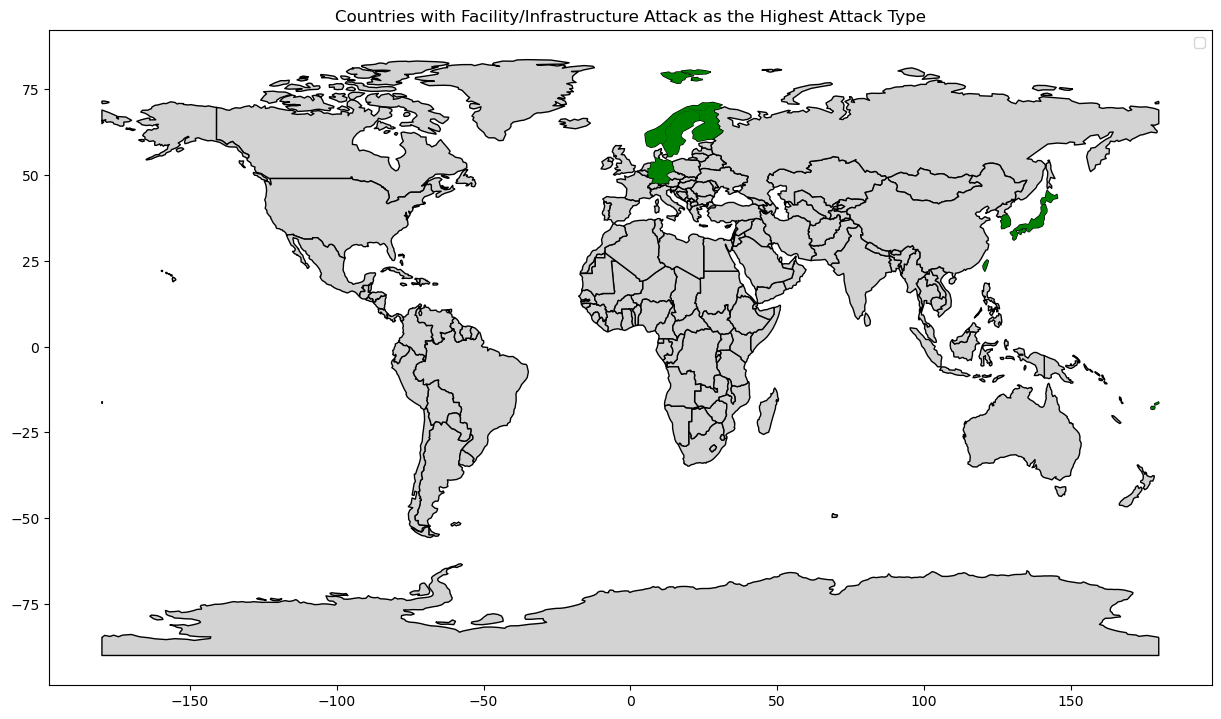

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("terrorism_dataset.csv")

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Find the dominant attack type for each country
dominant_attack_type_per_country = attack_types_per_country.idxmax(axis=1)

# Filter out countries where the dominant attack type is Facility/Infrastructure Attack
facility_infrastructure_countries = dominant_attack_type_per_country[dominant_attack_type_per_country == 'Facility/Infrastructure Attack']

# Convert facility_infrastructure_countries Series to DataFrame
facility_infrastructure_df = facility_infrastructure_countries.reset_index()

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the attack data with the world shapefile
world = world.merge(facility_infrastructure_df, how='left', left_on='name', right_on='country')

# Plotting the map
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot countries with Facility/Infrastructure Attack as the highest attack type
world[~world['country'].isnull()].plot(ax=ax, color='green')

# Add title and legend
plt.title('Countries with Facility/Infrastructure Attack as the Highest Attack Type')
plt.legend(['Facility/Infrastructure Attack'])

plt.show()


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_29936\2256564725.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


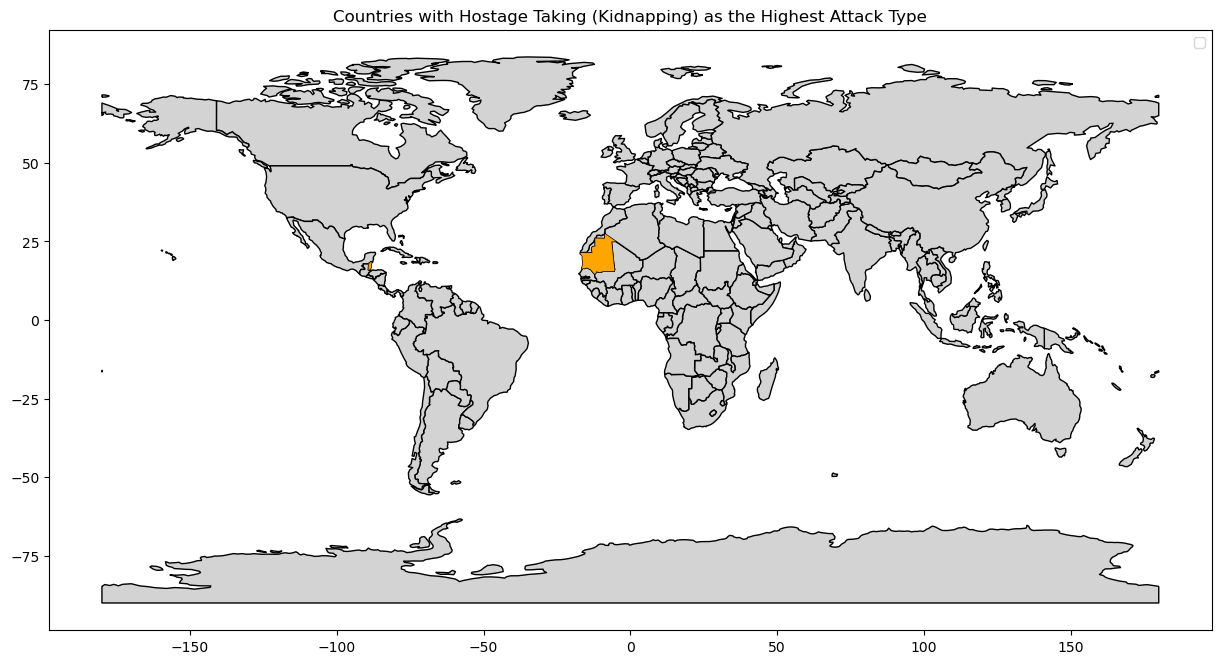

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("terrorism_dataset.csv")

# Group by country and attack type, then count the occurrences of each attack type
attack_types_per_country = df.groupby(['country', 'attacktype1_txt']).size().unstack(fill_value=0)

# Find the dominant attack type for each country
dominant_attack_type_per_country = attack_types_per_country.idxmax(axis=1)

# Filter out countries where the dominant attack type is Hostage Taking (Kidnapping)
hostage_taking_countries = dominant_attack_type_per_country[dominant_attack_type_per_country == 'Hostage Taking (Kidnapping)']

# Convert hostage_taking_countries Series to DataFrame
hostage_taking_df = hostage_taking_countries.reset_index()

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the attack data with the world shapefile
world = world.merge(hostage_taking_df, how='left', left_on='name', right_on='country')

# Plotting the map
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot countries with Hostage Taking (Kidnapping) as the highest attack type
world[~world['country'].isnull()].plot(ax=ax, color='orange')

# Add title and legend
plt.title('Countries with Hostage Taking (Kidnapping) as the Highest Attack Type')
plt.legend(['Hostage Taking (Kidnapping)'])

plt.show()
